# Model Evaluation

As of now, all of them have the same structure:
```
model: [
    Linear(128, 80),
    Activation('relu'),
    Linear(80, 40),
    Activation('relu'),
    Linear('40', '10'),
    Activation('tanh'),
]
```

## Optimizers Evaluation

Hyperparameters:
- epochs: 50
- criterion: Softmax and CCE Loss
- optimizer: [SGD, SGD with momentum, Adam]
- learning rate: 0.01
- momentum: [0,0.1,0.2,0.5,0.9] *only for SGD with momentum
- weight decay: 0
- batch sizes: 1

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
models = []
losses = {}
train_accuracies = {}
test_accuracies = {}
time_takens = {}

folder = "../log/optimizer-1/"
for file in os.listdir(folder):

    # get the data
    f = open(os.path.join(folder, file), "r")
    all_data = f.readlines()
    f.close()

    # get the time taken
    time_taken = all_data[-2:-1]
    time_taken = float(time_taken[0].strip("\n").split(":")[1].strip("seconds"))

    # split the data into different data
    data = all_data[4:-2]
    loss = np.zeros(len(data))
    train_accuracy = np.zeros(len(data))
    test_accuracy = np.zeros(len(data))
    for i, line in enumerate(data):
        line = line.strip("\n")
        loss[i] = float(line.split(",")[0].split("=")[1])
        train_accuracy[i] = float(line.split(",")[1].split("=")[1].strip("%"))
        test_accuracy[i] = float(line.split(",")[1].split("=")[1].strip("%"))

    # add the data
    file = file.replace('.txt', '').replace('1_log_', '')
    models.append(file)
    losses[file] = loss
    train_accuracies[file] = train_accuracy
    test_accuracies[file] = test_accuracy
    time_takens[file] = time_taken

# sort the models
models.sort(key=lambda x: x.replace('1_log_sgd_mom=', ''))
for model in models:
    print(model)

adam
sgd_mom=0
sgd_mom=0.1
sgd_mom=0.2
sgd_mom=0.5
sgd_mom=0.9


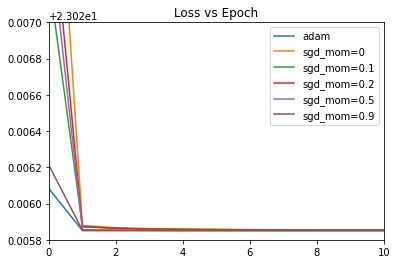

In [6]:
# plt.figure(figsize=(8, 20))
plt.title("Loss vs Epoch")
for model in models:
    plt.plot(losses[model], label=model)

plt.ylim((23.0258, 23.0270))
plt.xlim((0, 10))
plt.legend()
plt.show()

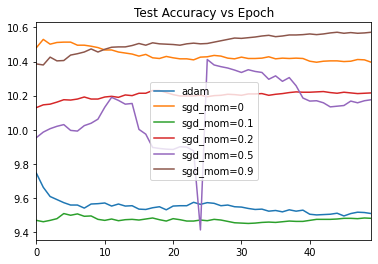

In [4]:
# plt.figure(figsize=(16, 12))
plt.title("Test Accuracy vs Epoch")
for model in models:
    plt.plot(test_accuracies[model], label=model)
plt.xlim((0, 49))
plt.legend()
plt.show()

adam: 9.508%
sgd_mom=0: 10.396%
sgd_mom=0.1: 9.48%
sgd_mom=0.2: 10.216%
sgd_mom=0.5: 10.176%
sgd_mom=0.9: 10.572%


[]

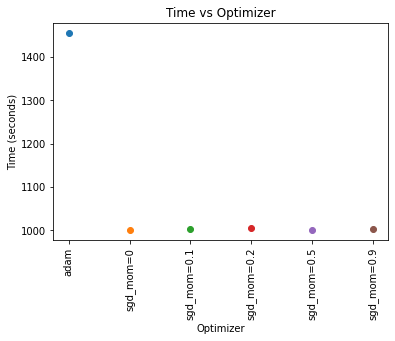

In [8]:
plt.title('Time vs Optimizer')
for model in models:
    plt.scatter(y=time_takens[model], x=model)
    print(f"{model}: {test_accuracies[model][-1]}%")

plt.ylabel("Time (seconds)")
plt.xlabel("Optimizer")
plt.xticks(rotation=90)
plt.plot()